In [1]:
from libraries import *
from parameters import *
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.model_selection import cross_val_score
from numpy import asarray
from numpy import savetxt

import scvi

%matplotlib inline

In [2]:
os.getcwd()
os.chdir(projectDir)

In [3]:
adata = sc.read('outputs/anndata/adata-hash-features_SingleKO_ForSCVI_09072021.h5ad')


In [5]:
for i in range(0,6):
    adata.obs[f'G_{i}'] = adata.obs[f'G_{i}'].astype(str)

In [6]:
adata.obs[f'G_CONTROL'] = adata.obs[f'G_CONTROL'].astype(str)

... storing 'G_0' as categorical
... storing 'G_1' as categorical
... storing 'G_2' as categorical
... storing 'G_3' as categorical
... storing 'G_4' as categorical
... storing 'G_5' as categorical
... storing 'G_CONTROL' as categorical


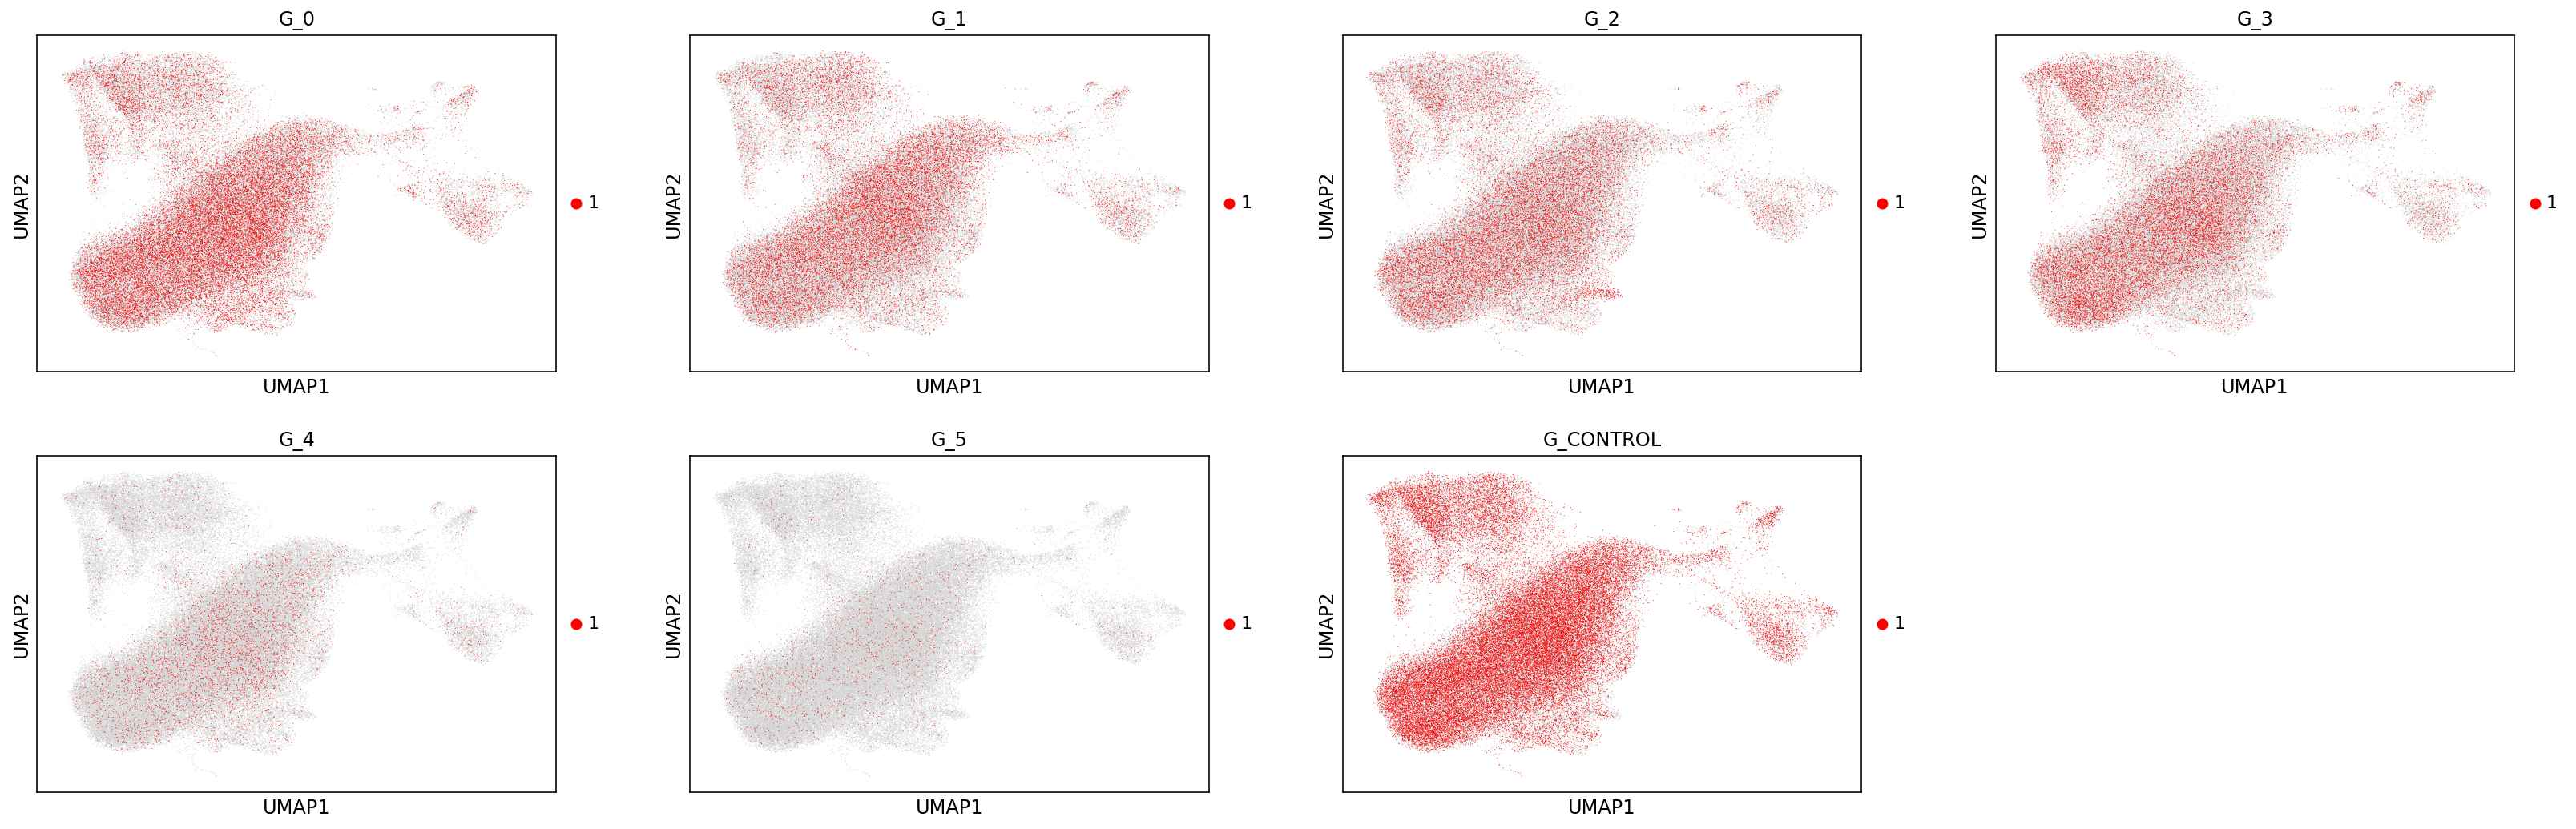

In [7]:
zs = ["G_0", "G_1","G_2", "G_3", "G_4", "G_5", "G_CONTROL"]
sc.pl.umap(adata, color=zs, ncols=4, palette=["grey", "red"], groups="1")

In [8]:
sc.tl.embedding_density(adata, groupby="G_0")
sc.tl.embedding_density(adata, groupby="G_1")
sc.tl.embedding_density(adata, groupby="G_2")
sc.tl.embedding_density(adata, groupby="G_3")
sc.tl.embedding_density(adata, groupby="G_4")
sc.tl.embedding_density(adata, groupby="G_5")
sc.tl.embedding_density(adata, groupby="G_CONTROL")


computing density on 'umap'
--> added
    'umap_density_G_0', densities (adata.obs)
    'umap_density_G_0_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_1', densities (adata.obs)
    'umap_density_G_1_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_2', densities (adata.obs)
    'umap_density_G_2_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_3', densities (adata.obs)
    'umap_density_G_3_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_4', densities (adata.obs)
    'umap_density_G_4_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_5', densities (adata.obs)
    'umap_density_G_5_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_CONTROL', densities (adata.obs)
    'umap_density_G_CONTROL_params', parameter (adata.uns)


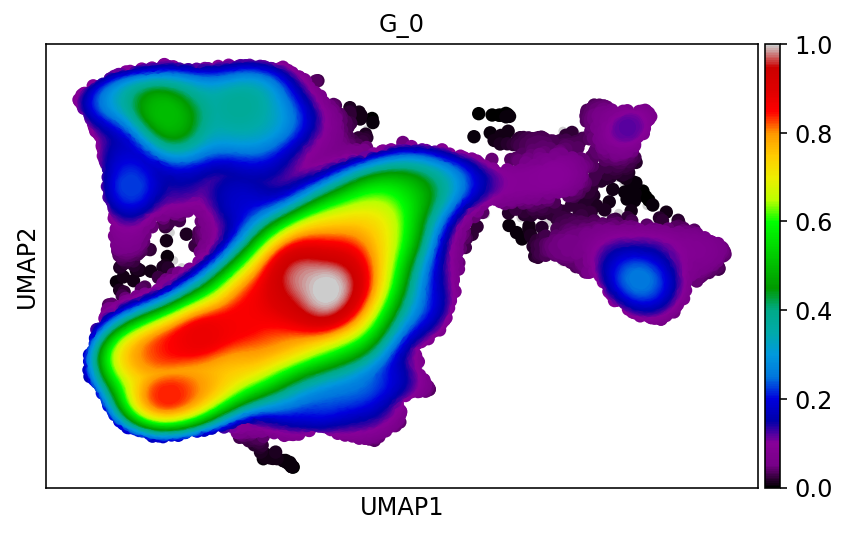

In [12]:
sc.pl.embedding_density(adata, key="umap_density_G_0", group="0", color_map="nipy_spectral", title="G_0")

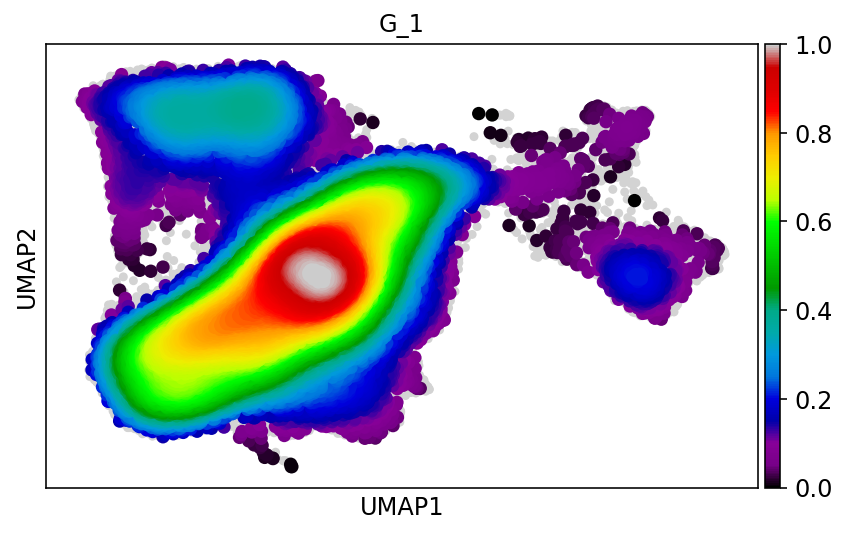

In [11]:
sc.pl.embedding_density(adata, key="umap_density_G_1", group="1", color_map="nipy_spectral",title="G_1")

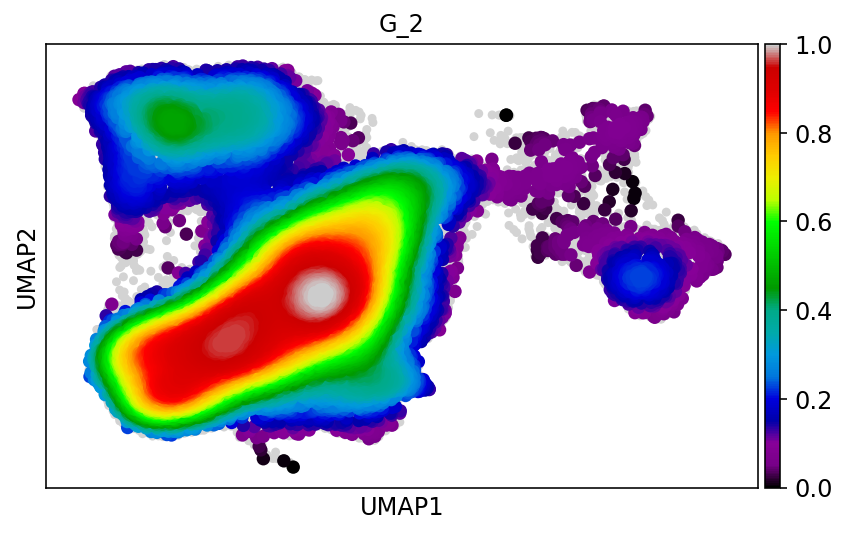

In [13]:
sc.pl.embedding_density(adata, key="umap_density_G_2", group="1", color_map="nipy_spectral", title="G_2")

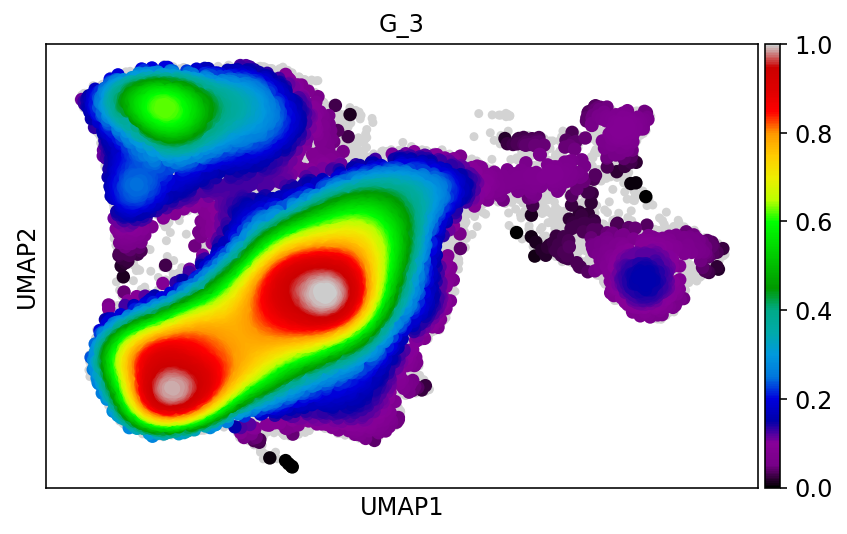

In [14]:
sc.pl.embedding_density(adata, key="umap_density_G_3", group="1", color_map="nipy_spectral", title="G_3")

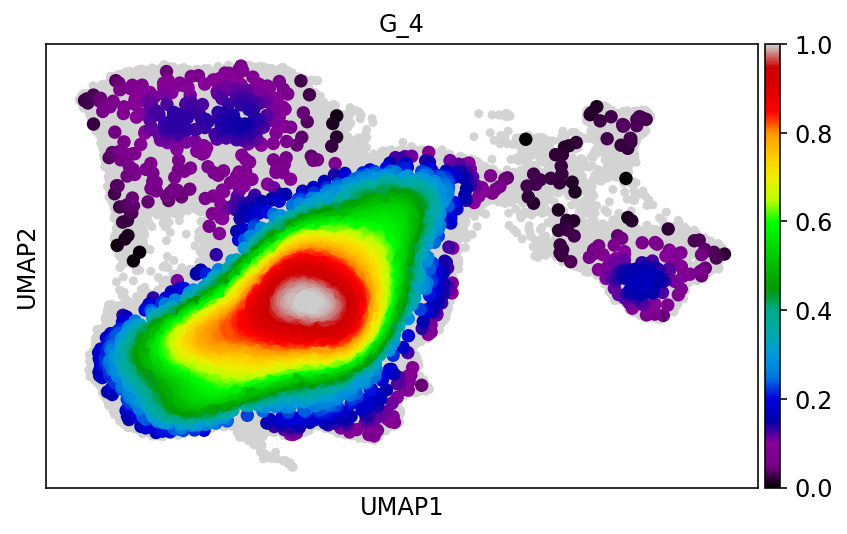

In [15]:
sc.pl.embedding_density(adata, key="umap_density_G_4", group="1", color_map="nipy_spectral", title="G_4")

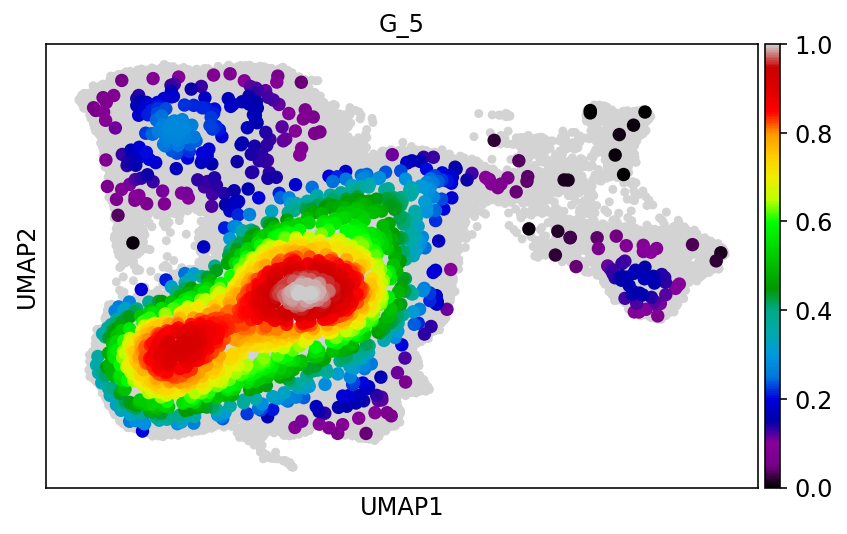

In [16]:
sc.pl.embedding_density(adata, key="umap_density_G_5", group="1", color_map="nipy_spectral", title="G_5")

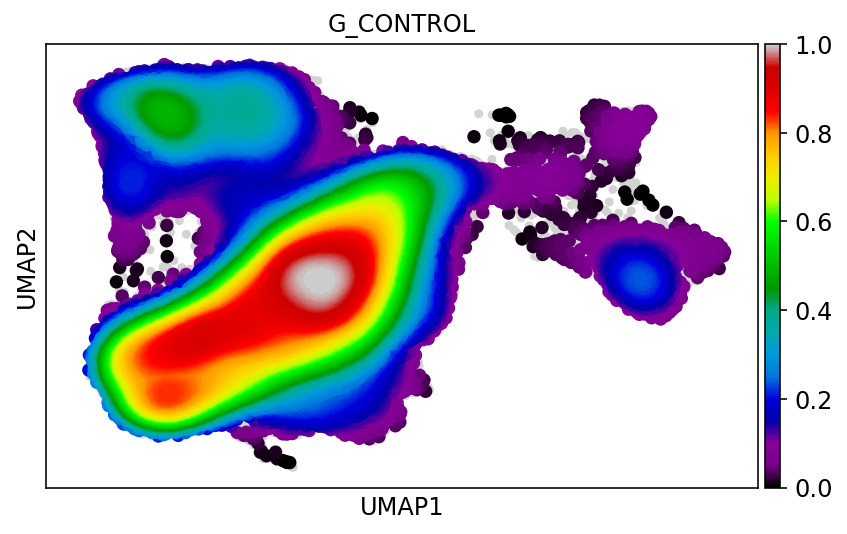

In [17]:
sc.pl.embedding_density(adata, key="umap_density_G_CONTROL", group="1", color_map="nipy_spectral", title="G_CONTROL")

In [18]:
adataSubType0 = adata[adata.obs['SubCellType_0'] == 1,]

/home/beraslan/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [19]:
adataSubType0.X.shape

(73359, 1041)

In [20]:
sc.tl.embedding_density(adataSubType0, groupby="G_0")
sc.tl.embedding_density(adataSubType0, groupby="G_1")
sc.tl.embedding_density(adataSubType0, groupby="G_2")
sc.tl.embedding_density(adataSubType0, groupby="G_3")
sc.tl.embedding_density(adataSubType0, groupby="G_4")
sc.tl.embedding_density(adataSubType0, groupby="G_5")
sc.tl.embedding_density(adataSubType0, groupby="G_CONTROL")


computing density on 'umap'


Trying to set attribute `.obs` of view, copying.


--> added
    'umap_density_G_0', densities (adata.obs)
    'umap_density_G_0_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_1', densities (adata.obs)
    'umap_density_G_1_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_2', densities (adata.obs)
    'umap_density_G_2_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_3', densities (adata.obs)
    'umap_density_G_3_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_4', densities (adata.obs)
    'umap_density_G_4_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_5', densities (adata.obs)
    'umap_density_G_5_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_G_CONTROL', densities (adata.obs)
    'umap_density_G_CONTROL_params', parameter (adata.uns)


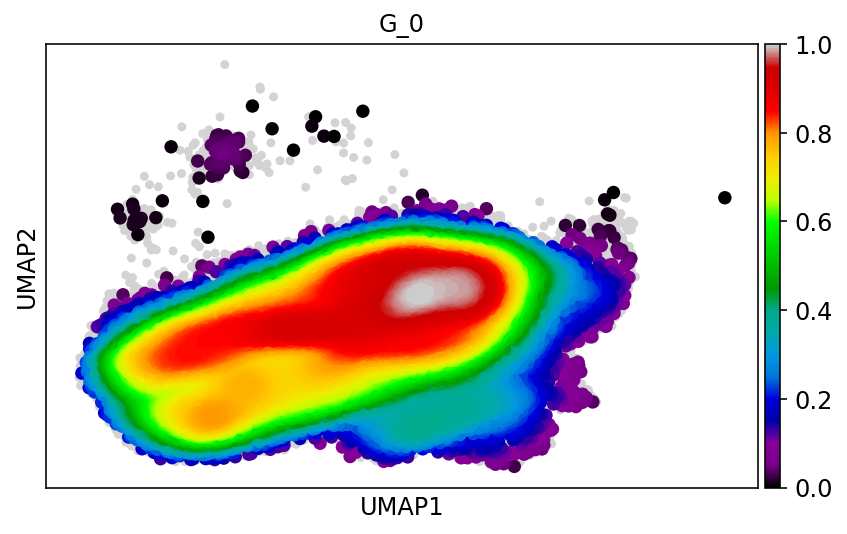

In [21]:
sc.pl.embedding_density(adataSubType0, key="umap_density_G_0", group="1", color_map="nipy_spectral",title="G_0")

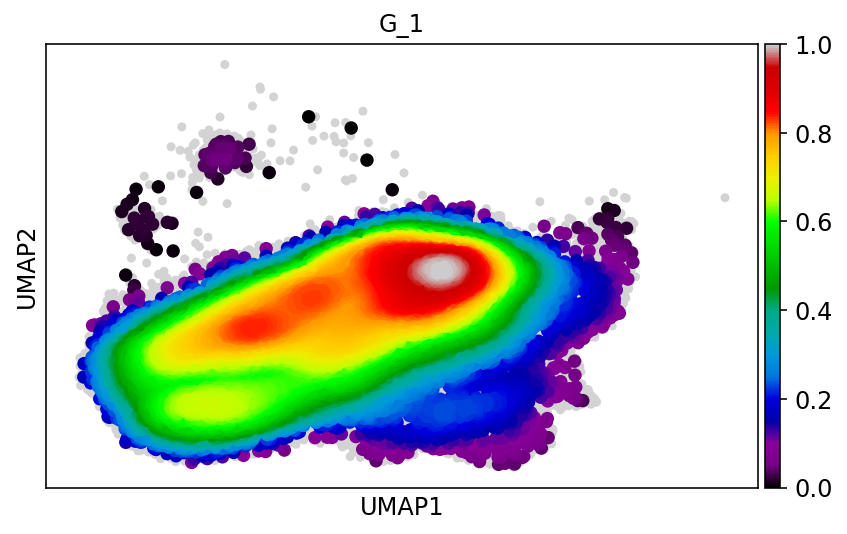

In [22]:
sc.pl.embedding_density(adataSubType0, key="umap_density_G_1", group="1", color_map="nipy_spectral",title="G_1")

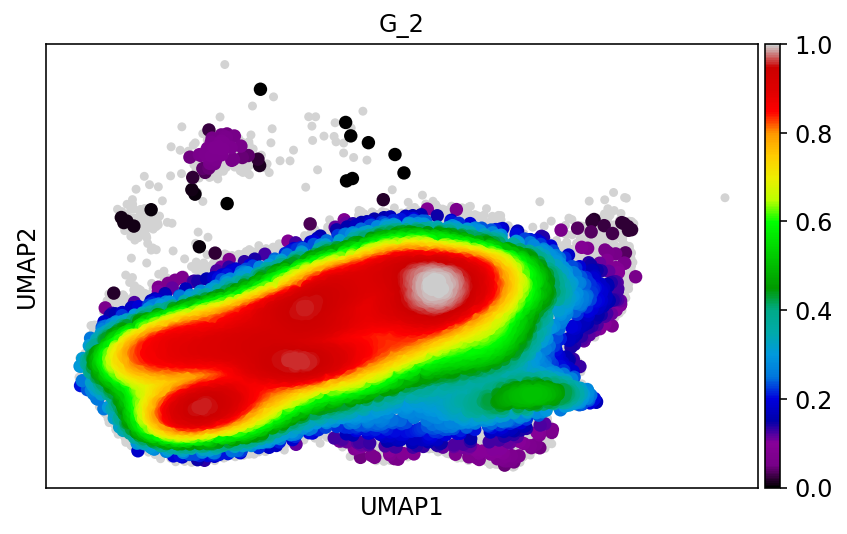

In [23]:
sc.pl.embedding_density(adataSubType0, key="umap_density_G_2", group="1", color_map="nipy_spectral",title="G_2")

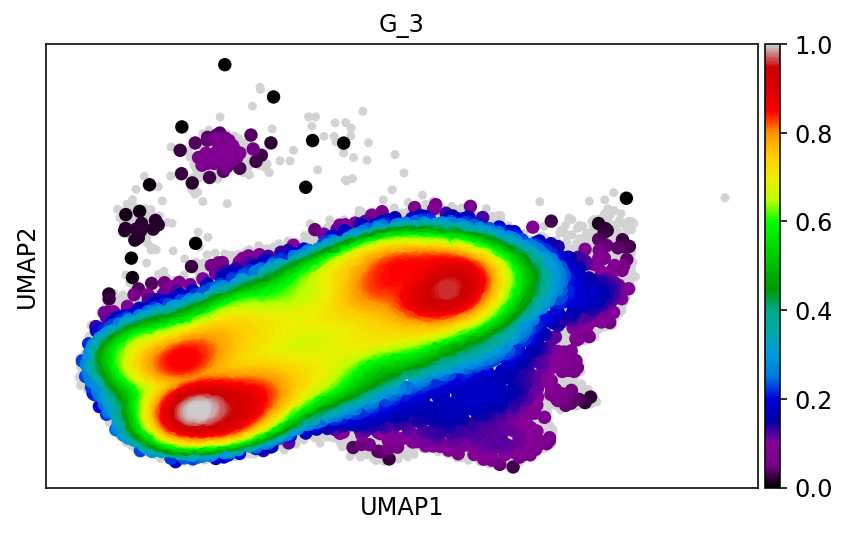

In [24]:
sc.pl.embedding_density(adataSubType0, key="umap_density_G_3", group="1", color_map="nipy_spectral",title="G_3")

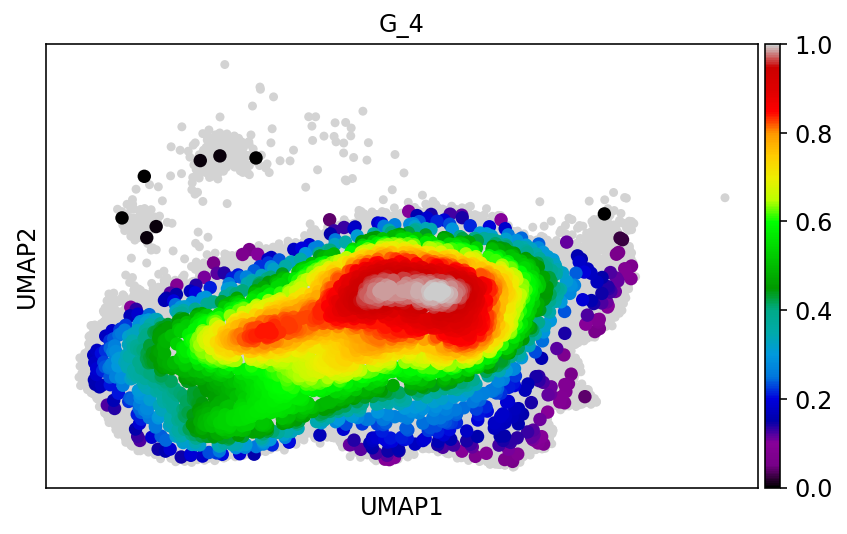

In [25]:
sc.pl.embedding_density(adataSubType0, key="umap_density_G_4", group="1", color_map="nipy_spectral",title="G_4")

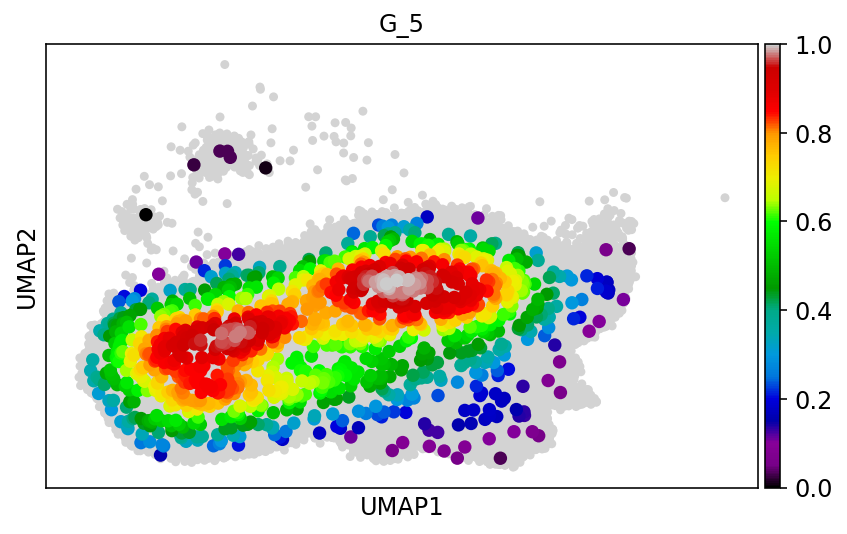

In [26]:
sc.pl.embedding_density(adataSubType0, key="umap_density_G_5", group="1", color_map="nipy_spectral",title="G_5")

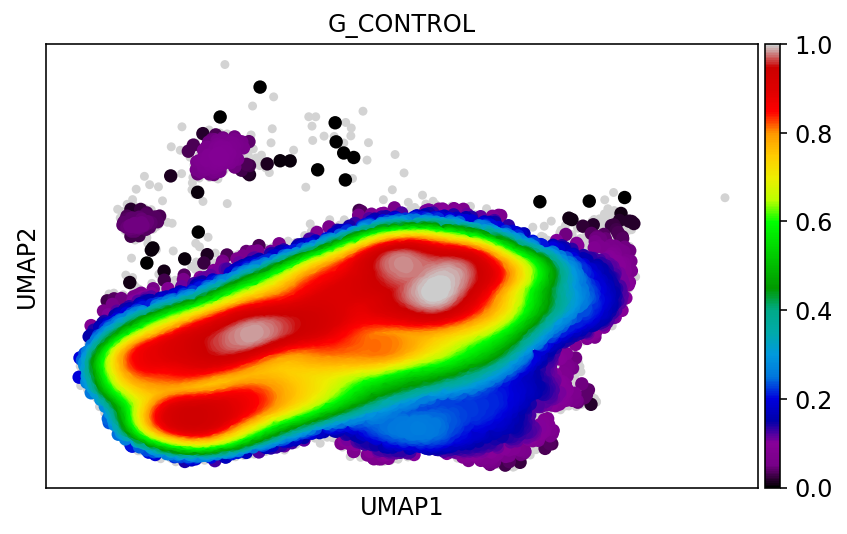

In [27]:
sc.pl.embedding_density(adataSubType0, key="umap_density_G_CONTROL", group="1", color_map="nipy_spectral",title="G_CONTROL")

In [ ]:
adataSubType1 = adata[adata.obs['SubCellType_1'] == 1,]

In [ ]:
sc.tl.embedding_density(adataSubType1, groupby="G_0")
sc.tl.embedding_density(adataSubType1, groupby="G_1")
sc.tl.embedding_density(adataSubType1, groupby="G_2")
sc.tl.embedding_density(adataSubType1, groupby="G_3")
sc.tl.embedding_density(adataSubType1, groupby="G_4")
sc.tl.embedding_density(adataSubType1, groupby="G_5")
sc.tl.embedding_density(adataSubType1, groupby="G_CONTROL")


In [ ]:
sc.pl.embedding_density(adataSubType1, key="umap_density_G_0", group="1", color_map="nipy_spectral",title="G_6")

In [ ]:
sc.pl.embedding_density(adataSubType1, key="umap_density_G_1", group="1", color_map="nipy_spectral",title="G_1")

In [ ]:
sc.pl.embedding_density(adataSubType1, key="umap_density_G_2", group="1", color_map="nipy_spectral",title="G_2")

In [ ]:
sc.pl.embedding_density(adataSubType1, key="umap_density_G_3", group="1", color_map="nipy_spectral",title="G_3")

In [ ]:
sc.pl.embedding_density(adataSubType1, key="umap_density_G_4", group="1", color_map="nipy_spectral",title="G_4")

In [ ]:
sc.pl.embedding_density(adataSubType1, key="umap_density_G_5", group="1", color_map="nipy_spectral",title="G_5")

In [ ]:
sc.pl.embedding_density(adataSubType1, key="umap_density_G_CONTROL", group="1", color_map="nipy_spectral",title="G_CONTROL")